In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Thu Feb  6 19:07:26 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [180]:
from mpl_toolkits.mplot3d import Axes3D
from enum import Enum
from scipy.linalg import norm
from scipy.spatial.distance import euclidean

In [337]:
from dataclasses import dataclass
import abc
from typing import Sequence

from pynext.system_of_units import *
from pynext.graphics import draw_cylinder
from pynext.graphics import draw_sphere
from pynext.graphics import draw_cylynder_surface
from pynext.graphics import draw_vuv
from pynext.graphics import draw_spherical_sample
from pynext.graphics import draw_points_sphere
from pynext.graphics import draw_random_point_around_point
from pynext.graphics import draw_vuv_to_blue
from pynext.graphics import vuv_to_blue_transport_from_point_with_graphics
from pynext.graphics import draw_cylnder_nomal_at_P

In [353]:
from pynext.pynext_types import Cylinder, Sphere, Ray
from pynext.pynext_types import FiberWLS
from pynext.pynext_types import Verbosity
from pynext.pynext_types import vprint, vpblock

In [7]:
from pynext.pynext_base import sample_spherical
from pynext.pynext_base import vectors_spherical
from pynext.pynext_base import xyz_from_points
from pynext.pynext_base import vuv_transport
from pynext.pynext_base import  xyz_from_vuv
from pynext.pynext_base import  vuv_fractions
from pynext.pynext_base import  ray_intersection_with_cylinder
from pynext.pynext_base import  cylinder_intersection_roots
from pynext.pynext_base import  ray_intersection_with_cylinder_end_caps
from pynext.pynext_base import  xyz_from_points
from pynext.pynext_base import  point_inside_cylinder
from pynext.pynext_base import  point_in_cylinder
from pynext.pynext_base import  unit_vectors_from_two_points
from pynext.pynext_base import  vuv_to_blue_transport_from_point
from pynext.pynext_base import  blue_to_blue_transport_from_point
from pynext.pynext_base import  vuv_to_blue_transport
from pynext.pynext_base import  random_point_around_p_inside_cylinder

In [371]:
from pynext.pynext_base import  reflected_ray
from pynext.transport import  fiber_transport

In [366]:
from pynext.histograms import  h1, h1d

In [243]:
from typing import Tuple, List

In [244]:
from enum import Enum

## Defines and draws a cylinder

In [325]:
r    = 2 * mm
zmin = -50 * mm
zmax = 50 * mm
chd =Cylinder(r, zmin, zmax)
chd

Cylinder(r=2.0, zmin=-50.0, zmax=50.0)

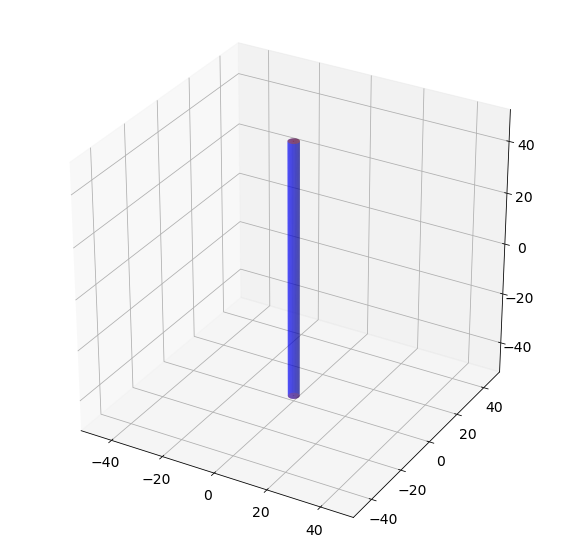

In [326]:
draw_cylinder(chd, units=mm, alpha=0.5, DWORLD=True, 
              WDIM=[(zmin,zmax),(zmin,zmax),(zmin,zmax)],
              figsize=(10,10))

### Find a point in the cylinder surface

In [345]:
P = vuv_transport(chd, p=np.array([0,0,0]), nphotons=1)

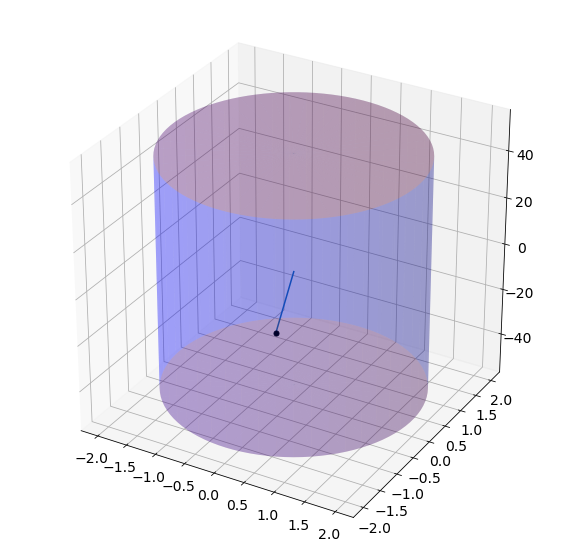

In [347]:
draw_vuv(P, chd, drawRays=True, figsize=(10,10))

In [348]:
P

array([[ 0.77514017, -1.84368048,  3.26701874]])

### Check that point is in the cylinder surface

In [349]:
chd.cylinder_equation(P[0])

0.0

### Check that the normal to the surface in point P[0] is unit

In [350]:
N = chd.normal_to_barrel(P[0])
N

array([ 0.38757009, -0.92184024,  0.        ])

In [351]:
norm(N)

1.0

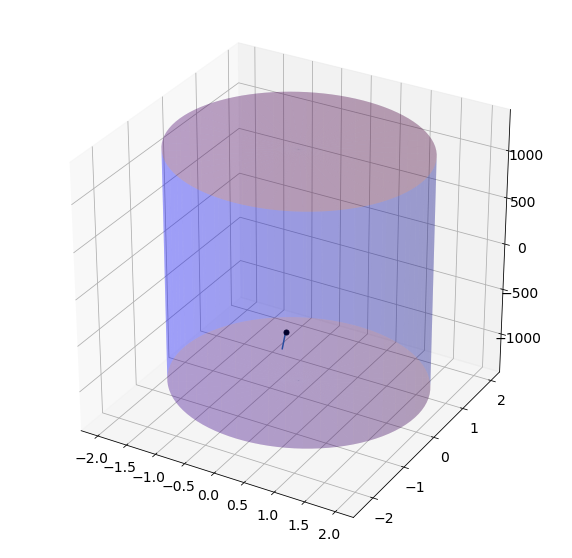

In [403]:
draw_cylnder_nomal_at_P(P[0], chd, tscale=0.5, figsize=(10,10))

## Fiber Transport

In [377]:
ncore = 1.6
ncld1 = 1.49
thetac = np.arcsin(ncld1/ncore)
print(f'Critical angle for fiber = {thetac/degree}')

Critical angle for fiber = 68.63051303142856


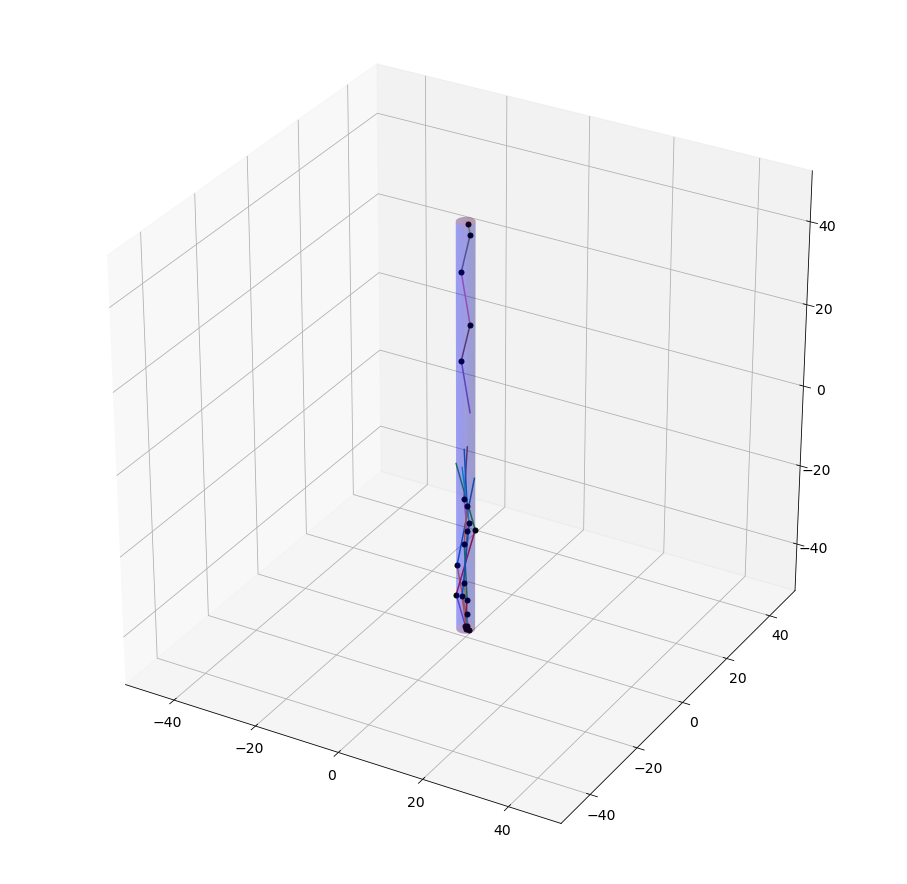

In [378]:
ntr, NR, LE = fiber_transport(chd, p0, thetac = thetac, nphotons =100,
                              verbosityLevel = Verbosity.concise, 
                              drawAll = False,
                              drawReflected = True,
                              DWORLD=True, 
                              WDIM=[(zmin,zmax),(zmin,zmax),(zmin,zmax)])

In [379]:
ntr

6

In [380]:
ntr, NR, LE = fiber_transport(chd, p0, thetac = thetac, nphotons =1000,
                              verbosityLevel = Verbosity.concise, 
                              drawAll = False,
                              drawReflected = False,
                              DWORLD=True, 
                              WDIM=[(zmin,zmax),(zmin,zmax),(zmin,zmax)])

In [381]:
ntr

71

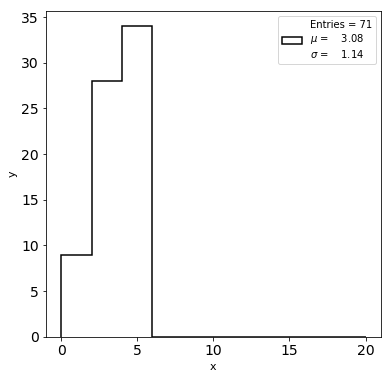

In [382]:
n, b, mu, std = h1d(NR, bins=10, range=(0,20))

In [384]:
d = (zmax-zmin)/2

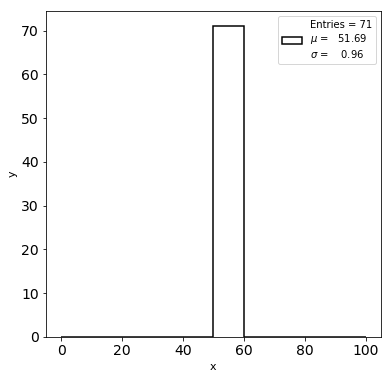

In [386]:
n, b, mu, std = h1d(LE, bins=10, range=(0,2*d))

In [387]:
r    = 2 * mm
zmin = -1250 * mm
zmax = 1250 * mm
chd =Cylinder(r, zmin, zmax)
chd

Cylinder(r=2.0, zmin=-1250.0, zmax=1250.0)

In [400]:
nphotons=5000
d = (zmax-zmin)/2

In [396]:
ntr, NR, LE = fiber_transport(chd, p0, thetac = thetac, nphotons =nphotons,
                              verbosityLevel = Verbosity.concise, 
                              drawAll = False,
                              drawReflected = False,
                              DWORLD=True, 
                              WDIM=[(zmin,zmax),(zmin,zmax),(zmin,zmax)])

In [397]:
print(f'trapping efficiency ={ntr/nphotons}')

trapping efficiency =0.0636


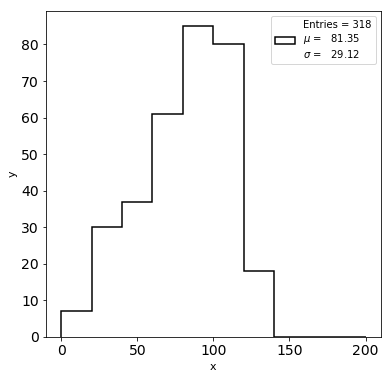

In [398]:
n, b, mu, std = h1d(NR, bins=10, range=(0,200))

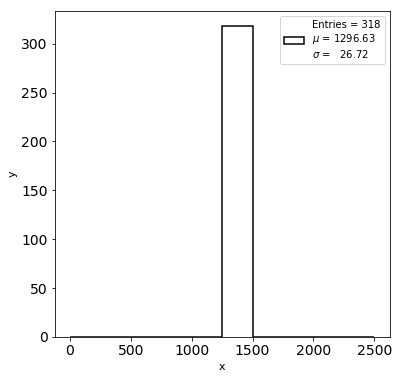

In [401]:
n, b, mu, std = h1d(LE, bins=10, range=(0,2*d))